In [1]:
############################################
import os 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
#
import numpy as np
#
# https://docs.pymc.io/
import pymc3 as pm
import theano
import time
from pymc3.backends.base import merge_traces
#
print('numpy      Ver.', np.__version__)
print('matplotlib Ver.', mpl.__version__)
print('pymc3      Ver.', pm.__version__)
print('theano     Ver.', theano.__version__)
#
#
file_path = "demo03-Gauss04/"
#
if( True != os.path.isdir(file_path) ):
    print('making ', file_path )
    os.mkdir(file_path)
else:
    print(file_path, ' is exist.' )

numpy      Ver. 1.19.2
matplotlib Ver. 3.3.2
pymc3      Ver. 3.8
theano     Ver. 1.0.4
demo03-Gauss04/  is exist.


In [2]:
############################################
def Gauss3(X, a1, mu1, b1, \
              a2, mu2, b2, \
              a3, mu3, b3 ):
    y = a1*np.exp(-b1*(X-mu1)*(X-mu1)/2) + \
        a2*np.exp(-b2*(X-mu2)*(X-mu2)/2) + \
        a3*np.exp(-b3*(X-mu3)*(X-mu3)/2) 
    return y

In [3]:
######################################
def grf_Gauss(X, 
              Y_true, Y,
              title):
    #
    plt.rcParams['font.size'] = 16
    #
    fig = plt.figure( figsize=(6,6) )
    fig.subplots_adjust( \
            left=0.15, right=0.98, 
            top=0.93,  bottom=0.1 )
    #
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel('x')
    ax1.set_ylabel('g(x)')
    #
    ax1.plot(X, Y_true, color='red', \
             linewidth=2.0, \
             label=r'$Y_{true}$' )
    #
    ax1.scatter(X, Y, color='blue',  \
                s=10.0, 
                label=r'$Y$' )
    #
    plt.title( title )
    plt.legend()
    #
    return fig

In [4]:
############################################
N = 301
#
X = np.linspace(0, 3.0, num=N, \
                endpoint=True )
#
a1_true  = 0.587
mu1_true = 1.210
b1_true  = 95.689
#
a2_true  = 1.522
mu2_true = 1.455
b2_true  = 146.837
#
a3_true  = 1.183
mu3_true = 1.703
b3_true  = 164.469
#
############################################
Y_true=Gauss3(X,a1_true,mu1_true,b1_true, \
                a2_true,mu2_true,b2_true, \
                a3_true,mu3_true,b3_true ) 
#
sigma_noise = 0.01
#
np.random.seed(seed=1)
#
Y_noise = np.random.normal( loc=0, 
                       scale=sigma_noise,
                       size=N )
Y_noise_mean = np.mean(Y_noise)
Y_noise_std  = np.std(Y_noise)
#
Y = Y_true + Y_noise
#
print(Y_noise_std)

0.009492162492854148


demo03-Gauss04/Gauss04-data-org.pdf


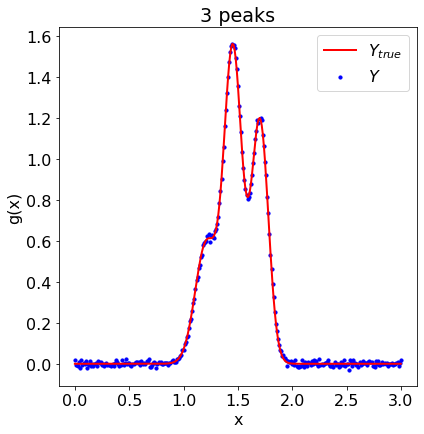

In [5]:
############################################
fig = grf_Gauss(X, Y_true, Y, \
          '3 peaks')
#
fname = "Gauss04-data-org.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

In [6]:
############################################
prior_mu_sd = 1.0 / np.sqrt(5.0)
print(prior_mu_sd)
############################################
def MCMC(Ydata):
    # for demo 
    np.random.seed(seed=1)
    #
    with pm.Model() as  model:
        #
        mu1 = pm.Normal('mu1', \
                mu=1.5, sd=prior_mu_sd)
        a1  = pm.Gamma('a1', \
                     alpha=5.0, beta=5.0)
        b1  = pm.Gamma('b1', \
                     alpha=5.0, beta=0.04)
        #
        mu2 = pm.Normal('mu2', \
                mu=1.5, sd=prior_mu_sd)
        a2  = pm.Gamma('a2', \
                     alpha=5.0, beta=5.0)
        b2  = pm.Gamma('b2', \
                     alpha=5.0, beta=0.04)
        #
        mu3 = pm.Normal('mu3', \
                mu=1.5, sd=prior_mu_sd)
        a3  = pm.Gamma('a3', \
                     alpha=5.0, beta=5.0)
        b3  = pm.Gamma('b3', \
                     alpha=5.0, beta=0.04)
        #
        rmsd = pm.Uniform('rmsd', \
                      lower=0, upper=1 )
        #
        y    = pm.Normal('y',
                mu=Gauss3(X, \
                          a1, mu1, b1, \
                          a2, mu2, b2, \
                          a3, mu3, b3 ), \
                sd=rmsd, \
                observed=Ydata)
        #
        # return pm.sample(10000, \
        #               tune=10000, \
        #               chains=2 )
        #
        return pm.sample(10000, \
                      tune=10000, \
                      chains=2 )    

0.4472135954999579


In [7]:
############################################
trace = MCMC( Y )

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rmsd, b3, a3, mu3, b2, a2, mu2, b1, a1, mu1]
Sampling 2 chains, 0 divergences: 100%|██████████| 40000/40000 [02:11<00:00, 304.88draws/s]
The rhat statistic is larger than 1.4 for some parameters. The sampler did not converge.
The estimated number of effective samples is smaller than 200 for some parameters.


C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has 

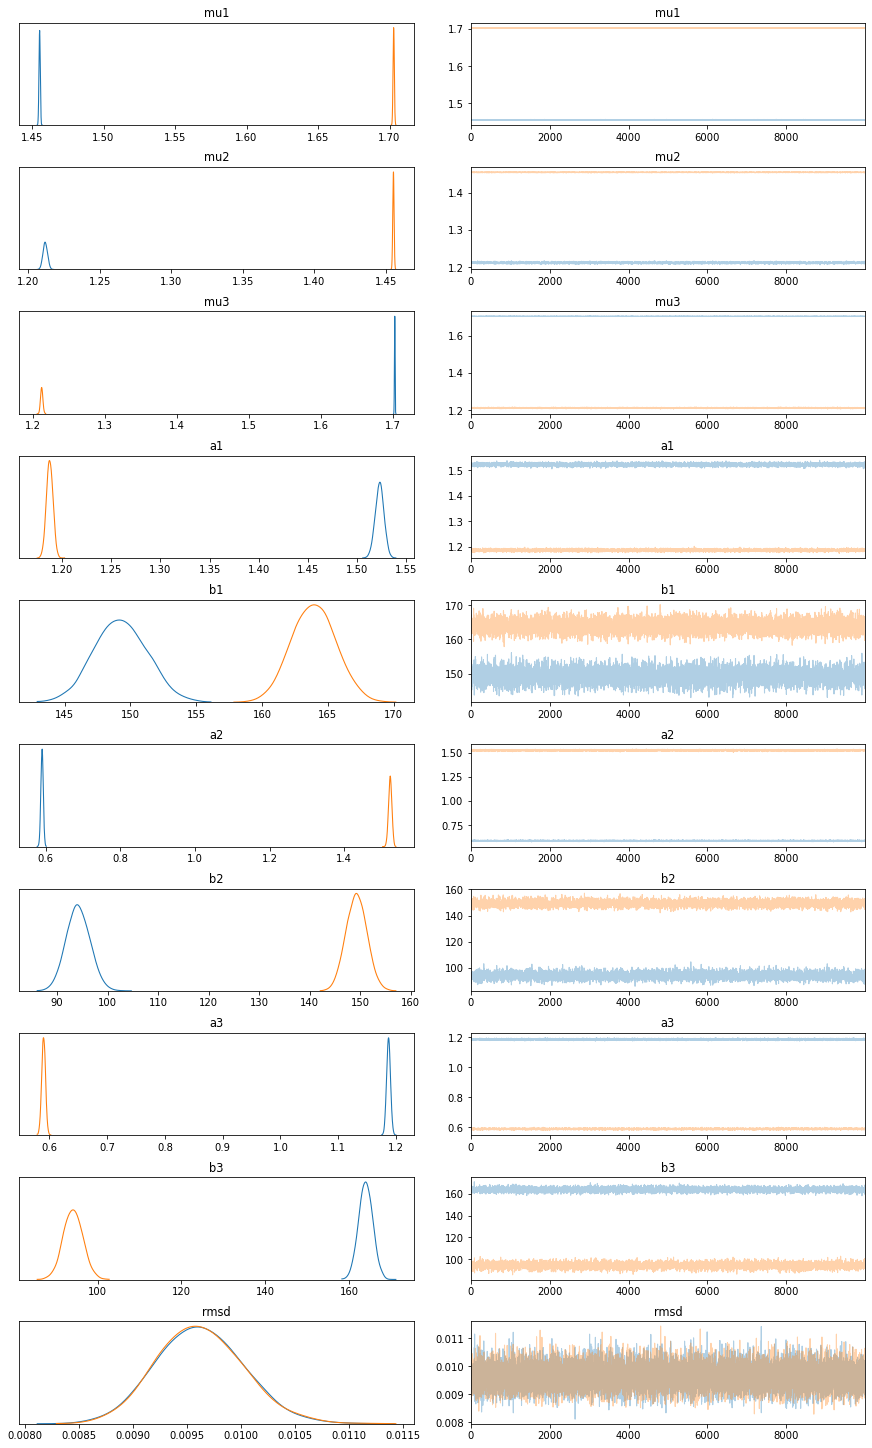

In [8]:
############################################
pm.traceplot(trace)
#
plt.savefig( file_path + \
    "Gauss04-trace01.pdf" )

In [9]:
############################################
pm.summary(trace)

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu1,1.579,0.124,1.455,1.704,0.088,0.074,2.0,2.0,3.0,41.0,1.83
mu2,1.334,0.122,1.210,1.456,0.086,0.073,2.0,2.0,3.0,42.0,1.83
mu3,1.457,0.246,1.210,1.704,0.174,0.147,2.0,2.0,3.0,45.0,1.83
a1,1.355,0.168,1.182,1.529,0.119,0.101,2.0,2.0,3.0,40.0,1.83
b1,156.598,7.566,146.299,166.617,5.223,4.381,2.0,2.0,3.0,43.0,1.83
a2,1.057,0.467,0.585,1.530,0.330,0.279,2.0,2.0,3.0,43.0,1.83
b2,121.715,27.641,90.571,152.417,19.490,16.497,2.0,2.0,3.0,46.0,1.83
a3,0.889,0.299,0.585,1.193,0.211,0.179,2.0,2.0,3.0,40.0,1.83
b3,129.039,34.941,90.843,166.592,24.666,20.893,2.0,2.0,3.0,42.0,1.83
rmsd,0.010,0.000,0.009,0.010,0.000,0.000,21724.0,21640.0,21768.0,14814.0,1.00


In [10]:
############################################
prior_mu_sd = 1.0 / np.sqrt(5.0)
print(prior_mu_sd)
############################################
def MCMC2(Ydata):
    # for demo 
    np.random.seed(seed=1)
    #
    with pm.Model() as  model:
        #
        mu1 = pm.Normal('mu1', \
                mu=1.5, sd=prior_mu_sd)
        a1  = pm.Gamma('a1', \
                     alpha=5.0, beta=5.0)
        b1  = pm.Gamma('b1', \
                     alpha=5.0, beta=0.04)
        #
        mu2 = pm.Normal('mu2', \
                mu=1.5, sd=prior_mu_sd)
        a2  = pm.Gamma('a2', \
                     alpha=5.0, beta=5.0)
        b2  = pm.Gamma('b2', \
                     alpha=5.0, beta=0.04)
        #
        mu3 = pm.Normal('mu3', \
                mu=1.5, sd=prior_mu_sd)
        a3  = pm.Gamma('a3', \
                     alpha=5.0, beta=5.0)
        b3  = pm.Gamma('b3', \
                     alpha=5.0, beta=0.04)
        #
        rmsd = pm.Uniform('rmsd', \
                      lower=0, upper=1 )
        #
        y    = pm.Normal('y',
                mu=Gauss3(X, \
                          a1, mu1, b1, \
                          a2, mu2, b2, \
                          a3, mu3, b3 ), \
                sd=rmsd, \
                observed=Ydata)
        #
        start = pm.find_MAP(method='powell')
        #
        print( start )
        #
        return pm.sample(10000, \
                         # tune=10000, \
                         start = start,
                         chains=2 )    

0.4472135954999579


In [11]:
############################################
trace2 = MCMC2( Y )

  0%|          | 0/5000 [00:00<?, ?it/s]C:\wsci\anaconda3\envs\pymc3\lib\site-packages\scipy\optimize\_minimize.py:517: RuntimeWarning: Method powell does not use gradient information (jac).
  warn('Method %s does not use gradient information (jac).' % method,
logp = 957.04, ||grad|| = 412.65: 100%|██████████| 3323/3323 [00:02<00:00, 1337.02it/s]         
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...


{'mu1': array(1.45536082), 'a1_log__': array(0.41995329), 'b1_log__': array(5.00483946), 'mu2': array(1.21201227), 'a2_log__': array(-0.5354373), 'b2_log__': array(4.53190732), 'mu3': array(1.70293226), 'a3_log__': array(0.17145682), 'b3_log__': array(5.09953301), 'rmsd_interval__': array(-4.66501941), 'a1': array(1.52189047), 'b1': array(149.13313912), 'a2': array(0.58541323), 'b2': array(92.93565044), 'a3': array(1.18703288), 'b3': array(163.94532827), 'rmsd': array(0.00933117)}


Multiprocess sampling (2 chains in 4 jobs)
NUTS: [rmsd, b3, a3, mu3, b2, a2, mu2, b1, a1, mu1]
Sampling 2 chains, 0 divergences: 100%|██████████| 21000/21000 [01:12<00:00, 289.57draws/s]


In [12]:
############################################
pm.summary( trace2 )

,mean,sd,hpd_3%,hpd_97%,mcse_mean,mcse_sd,ess_mean,ess_sd,ess_bulk,ess_tail,r_hat
mu1,1.455,0.000,1.455,1.456,0.000,0.000,10414.0,10413.0,10408.0,12688.0,1.0
mu2,1.212,0.002,1.209,1.215,0.000,0.000,7535.0,7534.0,7558.0,10028.0,1.0
mu3,1.703,0.000,1.702,1.704,0.000,0.000,11067.0,11067.0,11072.0,12666.0,1.0
a1,1.523,0.004,1.515,1.531,0.000,0.000,11380.0,11380.0,11444.0,12576.0,1.0
b1,149.248,2.012,145.401,152.990,0.023,0.016,7901.0,7897.0,7913.0,10990.0,1.0
a2,0.590,0.003,0.584,0.596,0.000,0.000,16043.0,16035.0,16046.0,13549.0,1.0
b2,94.186,2.297,89.873,98.480,0.025,0.018,8294.0,8294.0,8294.0,12157.0,1.0
a3,1.187,0.003,1.181,1.193,0.000,0.000,18121.0,18118.0,18169.0,14223.0,1.0
b3,163.966,1.664,160.850,167.102,0.015,0.011,11973.0,11973.0,11967.0,13322.0,1.0
rmsd,0.010,0.000,0.009,0.010,0.000,0.000,20169.0,20104.0,20170.0,13444.0,1.0


C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has not effect in matplotlib.plot_distSupplied value won't be used
  warnings.warn(
C:\wsci\anaconda3\envs\pymc3\lib\site-packages\arviz\plots\backends\matplotlib\distplot.py:36: UserWarning: Argument backend_kwargs has 

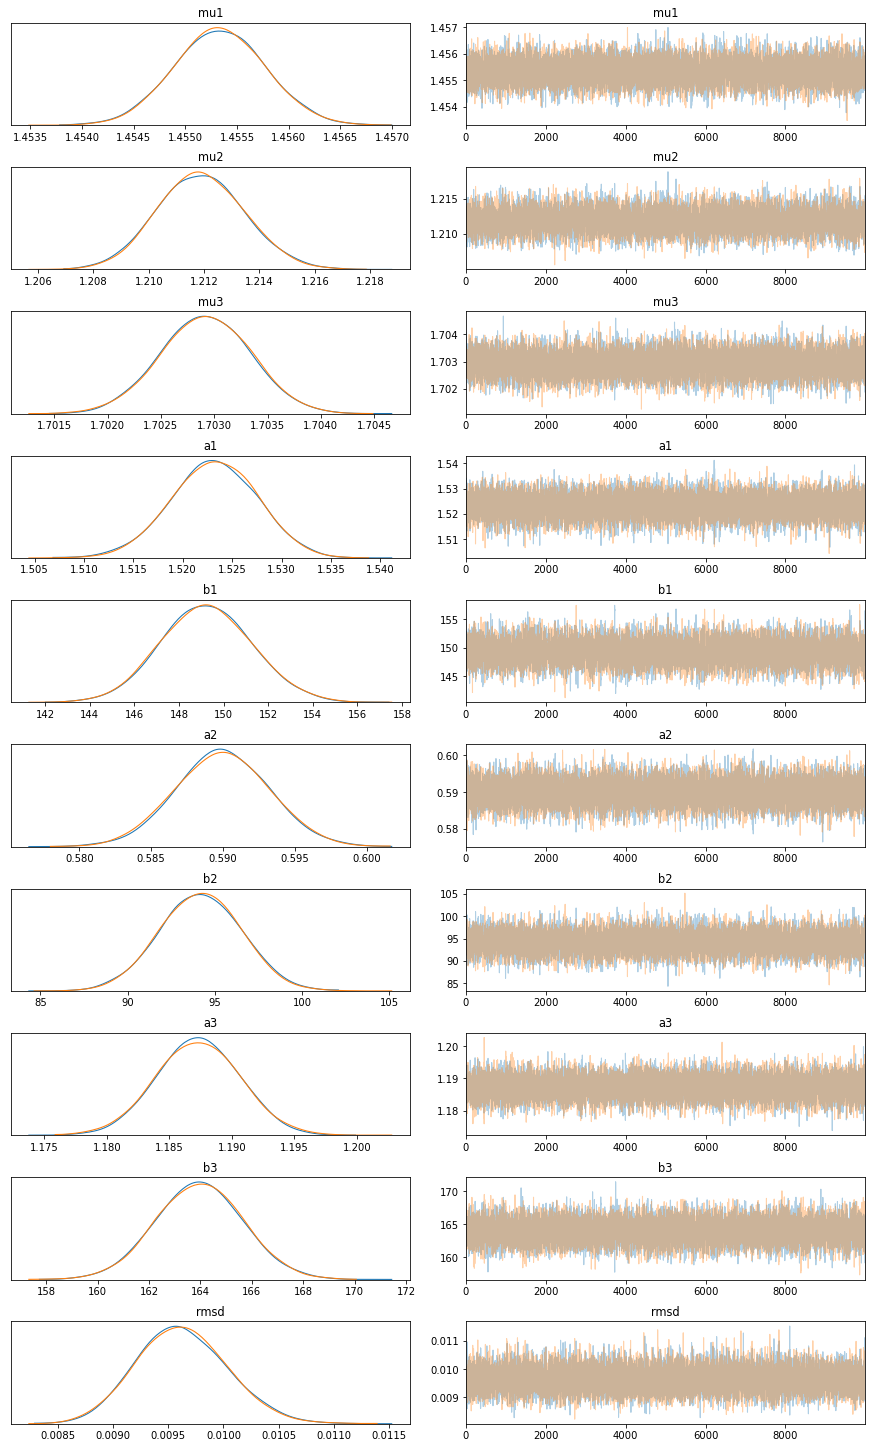

In [13]:
############################################
pm.traceplot( trace2 )
#
plt.savefig( file_path + \
    "Gauss04-trace02.pdf" )

In [14]:
############################################
def grf_PthetaD( trace, name, true_val, \
                 xlabel, ylabel ):
    plt.rcParams['font.size'] = 16
    #
    trace_theta= trace[ name ]
    #
    summary = pm.summary(trace,[name])
    #
    print('true-%s = %.5f' % \
          (name, true_val))
    #
    mean = np.float(summary['mean'])
    print('Mean-%s = %.5f' % \
          (name, mean))
    #
    fig = plt.figure( figsize=(6,6) )
    fig.subplots_adjust( \
                left=0.2, right=0.98, 
                top=0.99,  bottom=0.2 )
    #
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel( xlabel )
    ax1.set_ylabel( ylabel )
    plt.xticks(rotation=90)
    #
    bin_vals, bins, patches = ax1.hist( \
                    trace_theta, \
                    bins=100, \
                    density=True, \
                    color='gray', \
                    label='Posterior')
    #
    # MODE
    theta_MODE = bins[np.argmax(bin_vals)]
    print('MODE-%s  = %.5f' % \
          (name, theta_MODE))
    #
    (y_bot, y_top) = ax1.set_ylim()
    #
    ax1.vlines(mean, y_bot, y_top, \
               color='red', \
               label='Mean-'+name, \
               linestyles='dashed', \
               linewidth=1.0)
    #
    ax1.vlines(theta_MODE, y_bot, y_top, \
               color='blue', \
               label='MODE-'+name, \
               linestyles='dashed', \
               linewidth=1.0)
    #
    ax1.vlines(true_val, y_bot, y_top, \
               color='black', \
               label='True-'+name, \
               linestyles='dashed', \
               linewidth=1.0)
    #
    ax1.legend()
    #
    return fig, mean, theta_MODE

true-a1 = 1.52200
Mean-a1 = 1.52300
MODE-a1  = 1.52315
demo03-Gauss04/Gauss04-Posterior-a1.pdf


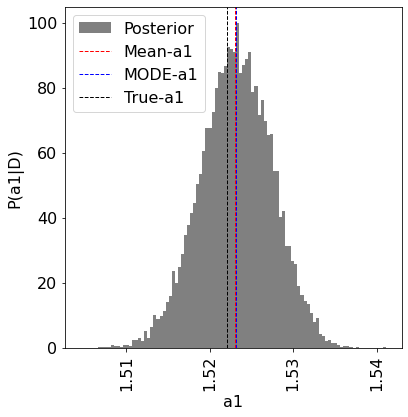

In [15]:
############################################
fig, a1_mean, a1_MODE = grf_PthetaD( \
                    trace2, 'a1', a2_true, \
                    'a1', 'P(a1|D)' )
#
fname = "Gauss04-Posterior-a1.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-a2 = 0.58700
Mean-a2 = 0.59000
MODE-a2  = 0.58987
demo03-Gauss04/Gauss04-Posterior-a2.pdf


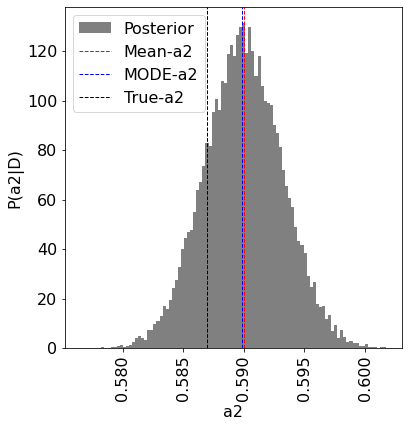

In [16]:
############################################
fig, a2_mean, a2_MODE = grf_PthetaD( \
                    trace2, 'a2', a1_true, \
                    'a2', 'P(a2|D)' )
#
fname = "Gauss04-Posterior-a2.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-a3 = 1.18300
Mean-a3 = 1.18700
MODE-a3  = 1.18711
demo03-Gauss04/Gauss04-Posterior-a3.pdf


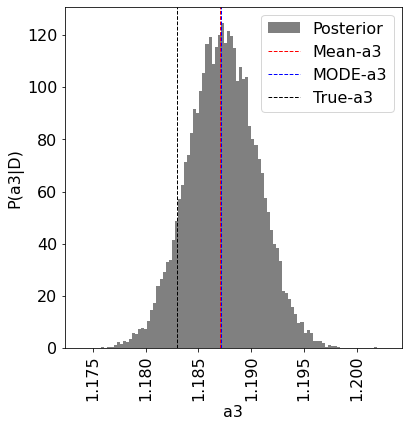

In [17]:
############################################
fig, a3_mean, a3_MODE = grf_PthetaD( \
                    trace2, 'a3', a3_true, \
                    'a3', 'P(a3|D)' )
#
fname = "Gauss04-Posterior-a3.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-mu1 = 1.45500
Mean-mu1 = 1.45500
MODE-mu1  = 1.45524
demo03-Gauss04/Gauss04-Posterior-mu1.pdf


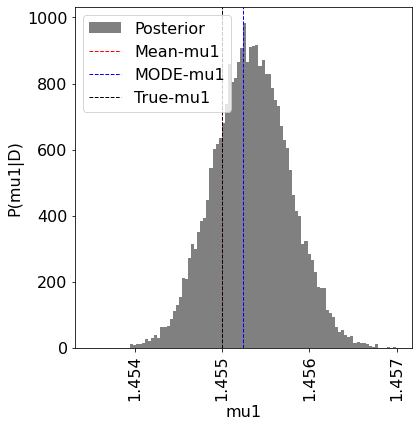

In [18]:
############################################
fig, mu1_mean, mu1_MODE = grf_PthetaD( \
                    trace2, 'mu1', mu2_true, \
                    'mu1', 'P(mu1|D)' )
#
fname = "Gauss04-Posterior-mu1.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-mu2 = 1.21000
Mean-mu2 = 1.21200
MODE-mu2  = 1.21170
demo03-Gauss04/Gauss04-Posterior-mu2.pdf


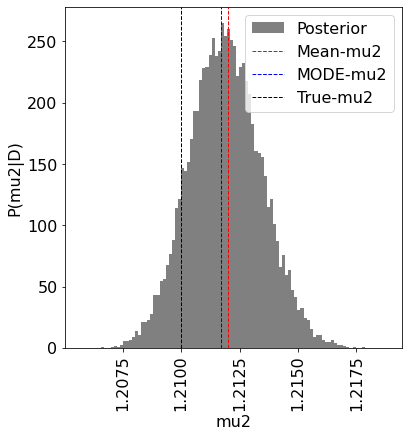

In [19]:
############################################
fig, mu2_mean, mu2_MODE = grf_PthetaD( \
                    trace2, 'mu2', mu1_true, \
                    'mu2', 'P(mu2|D)' )
#
fname = "Gauss04-Posterior-mu2.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-mu3 = 1.70300
Mean-mu3 = 1.70300
MODE-mu3  = 1.70286
demo03-Gauss04/Gauss04-Posterior-mu3.pdf


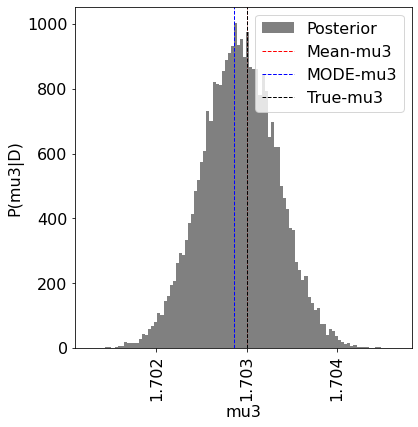

In [20]:
############################################
fig, mu3_mean, mu3_MODE = grf_PthetaD( \
                    trace2, 'mu3', mu3_true, \
                    'mu3', 'P(mu3|D)' )
#
fname = "Gauss04-Posterior-mu3.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-b1 = 146.83700
Mean-b1 = 149.24800
MODE-b1  = 149.40365
demo03-Gauss04/Gauss04-Posterior-b1.pdf


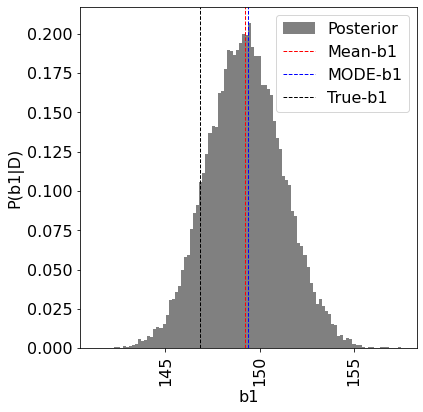

In [21]:
############################################
fig, b1_mean, b1_MODE = grf_PthetaD( \
                    trace2, 'b1', b2_true, \
                    'b1', 'P(b1|D)' )
#
fname = "Gauss04-Posterior-b1.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-b2 = 95.68900
Mean-b2 = 94.18600
MODE-b2  = 94.52984
demo03-Gauss04/Gauss04-Posterior-b2.pdf


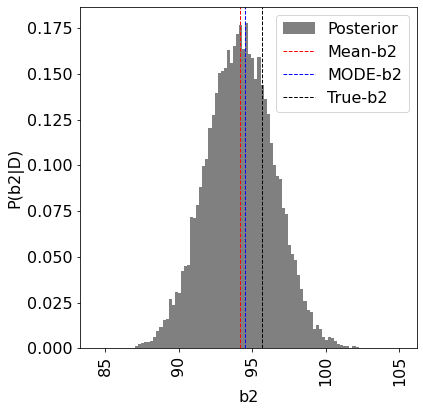

In [22]:
############################################
fig, b2_mean, b2_MODE = grf_PthetaD( \
                    trace2, 'b2', b1_true, \
                    'b2', 'P(b2|D)' )
#
fname = "Gauss04-Posterior-b2.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

true-b3 = 164.46900
Mean-b3 = 163.96600
MODE-b3  = 163.95698
demo03-Gauss04/Gauss04-Posterior-b3.pdf


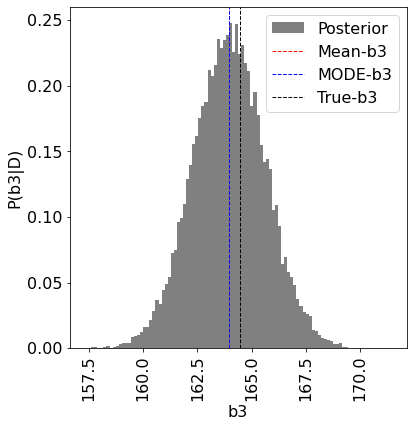

In [23]:
############################################
fig, b3_mean, b3_MODE = grf_PthetaD( \
                    trace2, 'b3', b3_true, \
                    'b3', 'P(b3|D)' )
#
fname = "Gauss04-Posterior-b3.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)

In [24]:
######################################
def grf_GaussRep(X, 
              Y_true, Y, 
              Y_mean, Y_MODE,
              title):
    #
    plt.rcParams['font.size'] = 16
    #
    fig = plt.figure( figsize=(6,6) )
    fig.subplots_adjust( \
            left=0.15, right=0.98, 
            top=0.93,  bottom=0.1 )
    #
    ax1 = fig.add_subplot(1,1,1)
    ax1.set_xlabel('x')
    ax1.set_ylabel('g(x)')
    #
    ax1.plot(X, Y_true, color='red', \
             linewidth=2.0, \
             label=r'$Y_{true}$' )
    #
    ax1.scatter(X, Y, color='blue',  \
                s=10.0, 
                label=r'$Y$' )
    #
    ax1.plot(X, Y_mean, color='blue', \
             linewidth=2.0, \
             label=r'$Y_{mean}$' )
    #
    ax1.plot(X, Y_MODE, color='green', \
             linewidth=2.0, \
             label=r'$Y_{MODE}$' )
    #
    plt.title( title )
    plt.legend()
    #
    return fig

demo03-Gauss04/Gauss04-data-reprod.pdf


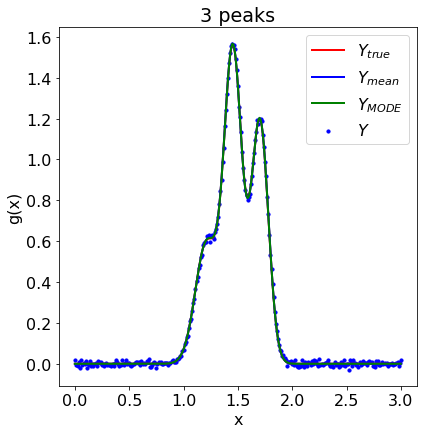

In [25]:
############################################
Y_mean = Gauss3(X, \
                a1_mean,mu1_mean,b1_mean, \
                a2_mean,mu2_mean,b2_mean, \
                a3_mean,mu3_mean,b3_mean ) 
#
Y_MODE = Gauss3(X, \
               a1_MODE,mu1_MODE,b1_MODE, \
               a2_MODE,mu2_MODE,b2_MODE, \
               a3_MODE,mu3_MODE,b3_MODE ) 
############################################
fig = grf_GaussRep(X, Y_true, Y, \
                Y_mean, Y_MODE, \
          '3 peaks')
#
fname = "Gauss04-data-reprod.pdf"
# set path
pp = PdfPages( file_path + fname )
# save figure
pp.savefig(fig)
pp.close()            
print(file_path + fname)